Expression levels of $77$ proteins obtained from $38$ normal genotype control mice  and from $34$ of their trisomic littermates, both with and without treatment with the drug memantine and with and without the stimulation to learn.

The data is from Higuera C, Gardiner KJ, Cios KJ. "Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome", PLoS One (2015)

In [1]:
import numpy as np
import pandas as pd

import networkx as nx

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
import clustergraph.plot_graph as pg

## Read and process data

In [2]:
df = pd.read_csv("data/mice_protein_no_NaN.csv")
X = df.iloc[:, :-1].to_numpy()  # drop of the labels column


def get_learning_outcome(lab):
    if lab == "c-CS-s" or lab == "c-CS-m":
        return "Normal"

    elif lab == "t-CS-s":
        return "Failed"

    elif lab == "t-CS-m":
        return "Rescued"

    else:
        return "No_learning"


labels = [get_learning_outcome(lab) for lab in df["class"]]
df["label"] = labels
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class,label
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.132539,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m,Normal
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.132539,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m,Normal
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.132539,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m,Normal
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132539,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m,Normal
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.132539,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.137082,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,t-SC-s,No_learning
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.137082,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,t-SC-s,No_learning
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.137082,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,t-SC-s,No_learning
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.137082,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,t-SC-s,No_learning


## Clustering

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)

pca = PCA(0.95)
X_pca = pca.fit_transform(X)

model = KMeans(18, random_state=42)
pred = model.fit_predict(X_pca)

(1080, 77)


C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


## ClusterGraph generation

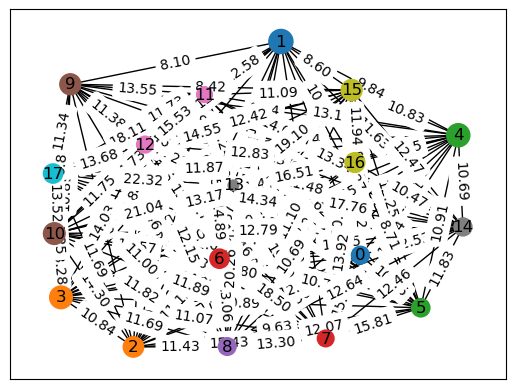

In [4]:
cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(pred), X=X_pca, metric_clusters="average"
)

# Coloring the graph
cluster_g.color_graph(
    node_color_labels=pred,
    node_palette=cm.get_cmap("tab10"),
)

pg.draw_graph(cluster_g.Graph, size_nodes=1000, random_state=42)

## Connectivity pruning

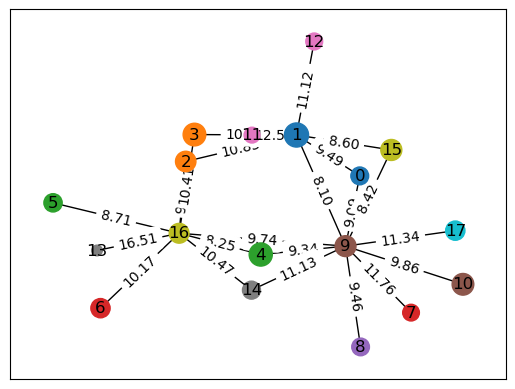

In [5]:
connectivity_graph, conn = cluster_g.prune_conn(score=True)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)
pg.draw_graph(connectivity_graph, size_nodes=1000, random_state=42)

## Pie chart visualization

In [6]:
cluster_color_dict = {
    "Failed": "#D81B60",
    "No_learning": "#FFC107",
    "Normal": "#1E88E5",
    "Rescued": "#004D40",
}

clusters_hexa = np.array([cluster_color_dict[c] for c in labels])

import matplotlib.patches as mpatches

keys = list(cluster_color_dict)
patches = [mpatches.Patch(color=cluster_color_dict[k], label=k) for k in keys]

In [7]:
# Coloring the graph with the labels
cluster_g.color_graph(
    node_color_labels=clusters_hexa,
)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)

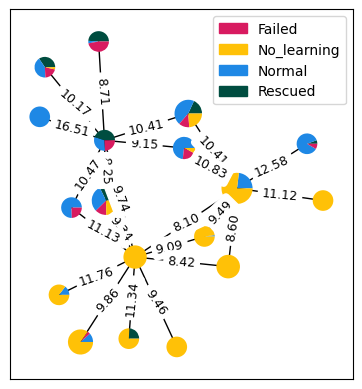

In [8]:
nb = len(list(connectivity_graph.edges))
pg.draw_graph_pie(
    connectivity_graph,
    nb_edges=nb,
    random_state=40,
    variable="weight_plot",
    size_nodes=0.06,
    font_size=8,
)
plt.legend(handles=patches)
plt.show()

# ClusterGraph and visualization methods

In [9]:
import umap as um

uma = um.UMAP(n_neighbors=15, random_state=42)
X_umap = uma.fit_transform(X_pca)

In [10]:
import phate

phate_operator = phate.PHATE(n_jobs=-2)
X_phate = phate_operator.fit_transform(X_pca)

Calculating PHATE...
  Running PHATE on 1080 observations and 31 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.06 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 0.28 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.21 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.94 seconds.
Calculated PHATE in 1.51 seconds.


In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tnse = tsne.fit_transform(X_pca)

In [12]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_pca)

C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [13]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_pca)

In [14]:
from minisom import MiniSom
som_size = (10, 10)
som = MiniSom(x=som_size[0], y=som_size[1], input_len=X_pca.shape[1], sigma=1.0, learning_rate=0.5)

som.random_weights_init(X_pca)
som.train_random(X_pca, 1000)  # Train for 1000 iterations

# Get the Best Matching Units (BMUs) for each sample
bmus = np.array([som.winner(x) for x in X_pca])
bmu_x, bmu_y = bmus[:, 0], bmus[:, 1]

C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\scanpy\preprocessing\_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\scanpy\preprocessing\_simple.py:387: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


NaNs before log1p: False
Label to Color Mapping:
Failed: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
No_learning: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
Normal: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
Rescued: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)


C:\Users\mathi\AppData\Local\Temp\ipykernel_13036\3162919829.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to make sure the legend fits within the figure


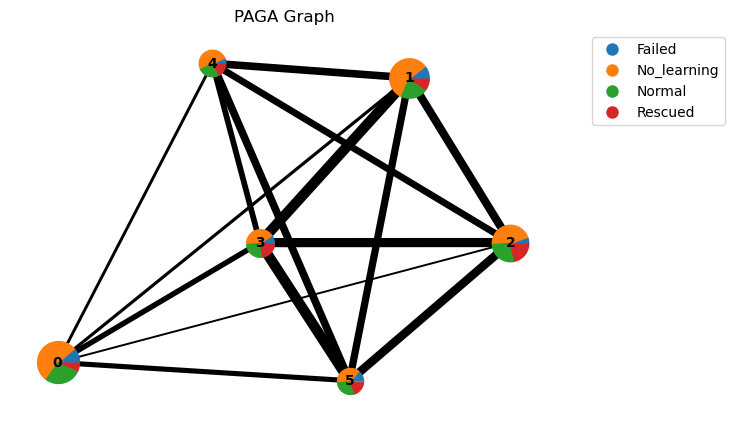

In [15]:
import scanpy as sc
import anndata
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

#X_ann = df.iloc[:, :-2].to_numpy()
X_ann = X_pca.copy()
adata = anndata.AnnData(X_ann)

sc.pp.normalize_total(adata, target_sum=1e4)
print("NaNs before log1p:", np.any(np.isnan(adata.X)))
adata.X += 1e-6  # Avoid log(0)
sc.pp.log1p(adata)

imputer = SimpleImputer(strategy="mean")
adata.X = imputer.fit_transform(adata.X)

sc.pp.pca(adata)
sc.pp.neighbors(adata,n_neighbors=25)


sc.tl.louvain(adata)
adata.obs["clusters"] = adata.obs["louvain"]
adata.obs["labels"] = labels

sc.tl.paga(adata, groups="clusters") 

sc.pl.paga(adata, color="labels", show=False, frameon=False, 
           title="PAGA Graph", cmap='tab10', node_size_scale=3.5)

# Get the unique labels
unique_labels = adata.obs['labels'].cat.categories.tolist()
cmap = plt.cm.tab10  
colors = [cmap(i) for i in range(len(unique_labels))]

# Map labels to their corresponding colors
label_color_map = dict(zip(unique_labels, colors))

# Print the label-color mapping
print("Label to Color Mapping:")
for label, color in label_color_map.items():
    print(f"{label}: {color}")


from matplotlib.lines import Line2D

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in colors]

plt.legend(handles=handles, labels=unique_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [16]:
import matplotlib.pyplot as plt
import matplotlib

for u, v, data in connectivity_graph.edges(data=True):
    connectivity_graph.edges[(u, v)]["spring"] = 1 / data["weight_plot"] * 10

unique_labels = adata.obs['labels'].cat.categories.tolist()  
cmap = plt.cm.tab10  # Directly using 'tab10'
colors = [cmap(i) for i in range(len(unique_labels))]

# Convert RGB colors to hexadecimal
label_color_map = {label: matplotlib.colors.rgb2hex(color[:3]) for label, color in zip(unique_labels, colors)}

print(label_color_map)
hex_colors = [label_color_map[label] for label in labels]

import matplotlib.patches as mpatches

keys = list(label_color_map)
patches = [mpatches.Patch(color=label_color_map[k], label=k) for k in keys]

{'Failed': '#1f77b4', 'No_learning': '#ff7f0e', 'Normal': '#2ca02c', 'Rescued': '#d62728'}


In [17]:
# Coloring the graph with the labels
cluster_g.color_graph(
    node_color_labels=np.array(hex_colors),
)

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=130)

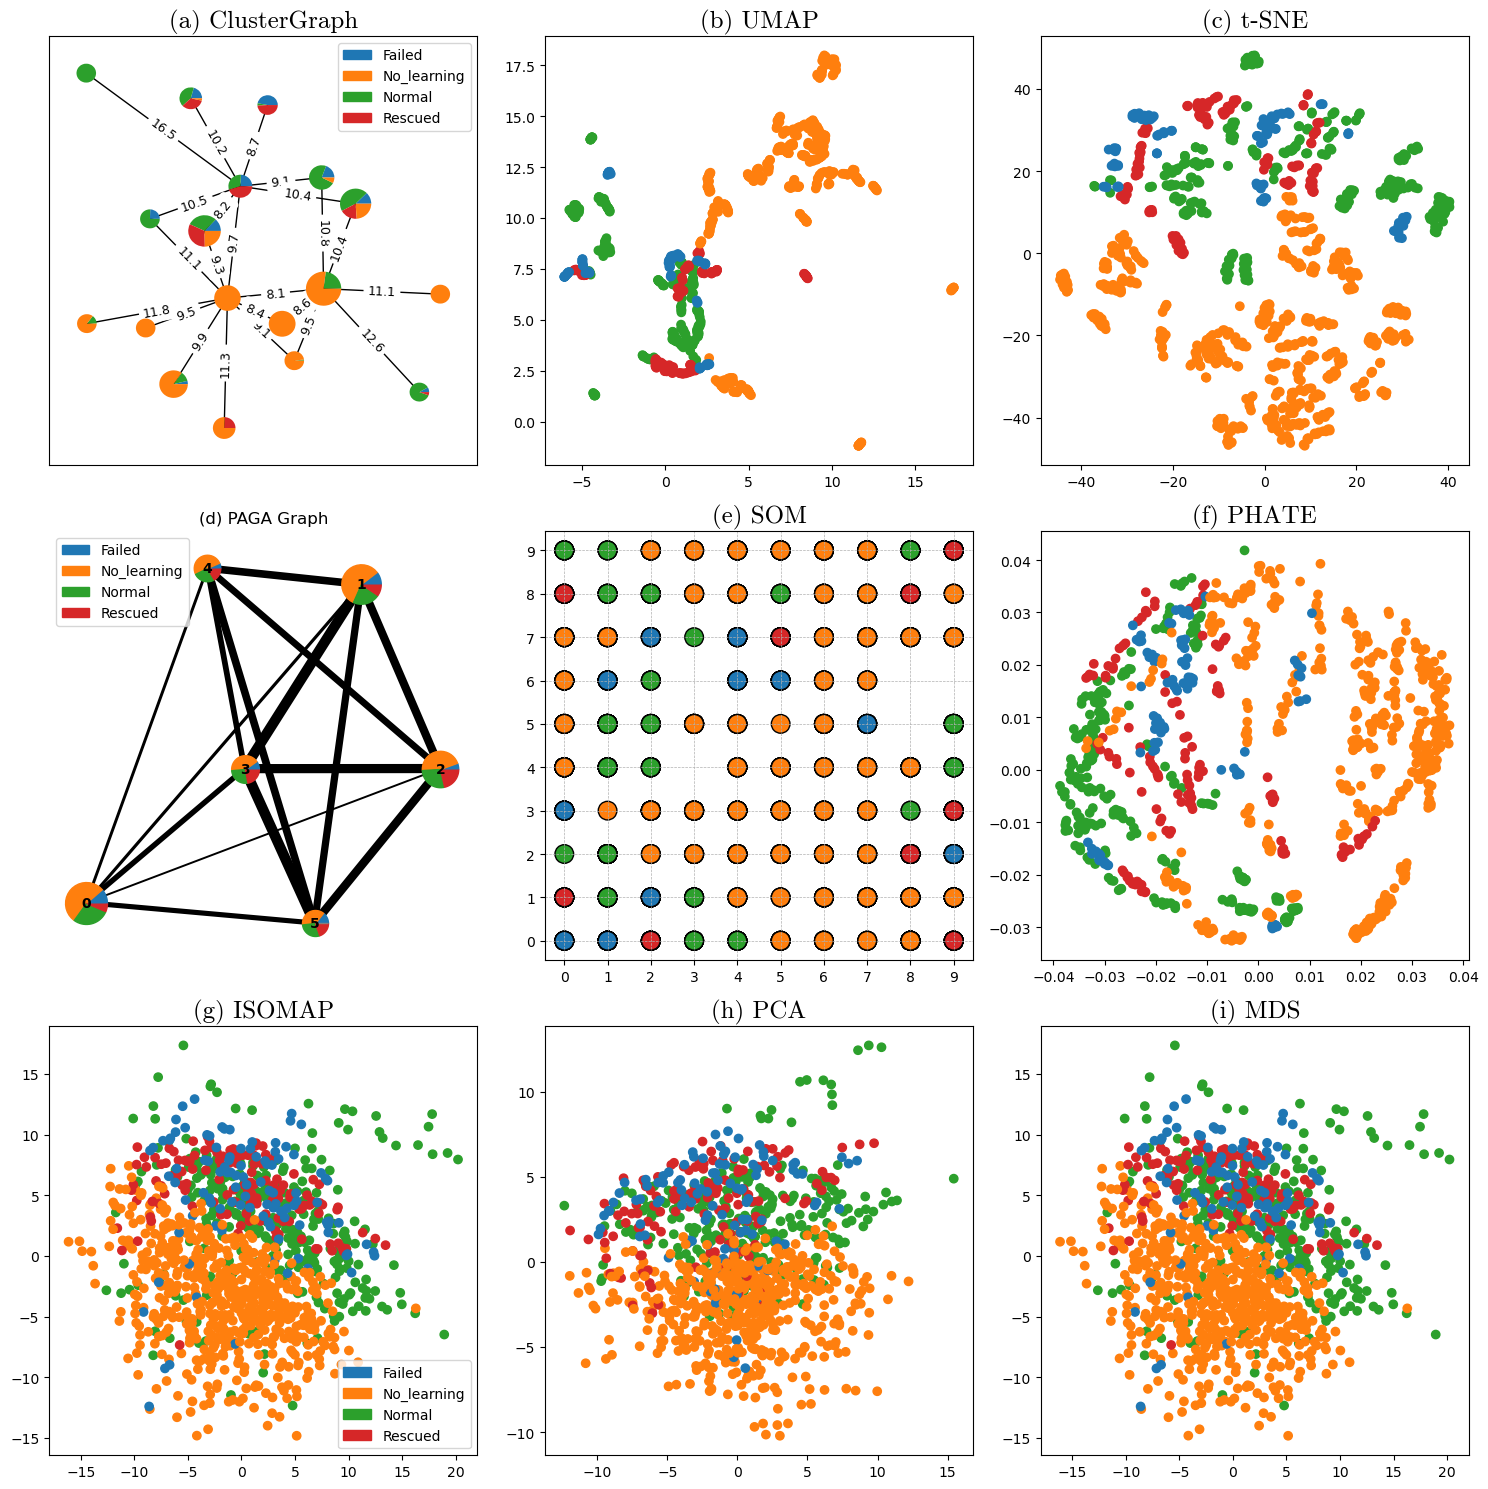

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
pos = nx.kamada_kawai_layout(connectivity_graph, scale=1, center=(0, 0), weight="weight")

nx.draw_networkx_edges(connectivity_graph, pos=pos, ax=axs[0, 0])

edge_labels = {
    (u, v): "{:.1f}".format(data["weight_plot"])
    for u, v, data in connectivity_graph.edges(data=True)
}
nx.draw_networkx_edge_labels(
    connectivity_graph,
    pos,
    edge_labels=edge_labels,
    font_color="black",
    font_size=9,
    ax=axs[0, 0],
)

xlim = axs[0, 0].get_xlim()
ylim = axs[0, 0].get_ylim()

for node, data in connectivity_graph.nodes(data=True):

    attributes = connectivity_graph.nodes[node]["data_perc_labels"]
    keys = list(attributes)
    attrs = [attributes[k] for k in keys]

    axs[0, 0].pie(
        attrs,
        center=pos[node],
        colors=[k for k in keys],
        radius=max(data["size_plot"] * 0.3, 0.05),
        frame=True,
    )


axs[0, 0].legend(handles=patches, loc="upper right")
axs[0, 0].set_aspect("auto")
axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=hex_colors)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)

axs[0, 2].scatter(X_tnse[:, 0], X_tnse[:, 1], c=hex_colors)
axs[0, 2].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

sc.pl.paga(adata, color="labels", show=False, frameon=False, 
           title="(d) PAGA Graph", cmap='tab10', ax=axs[1,0], node_size_scale=3.5)
axs[1, 0].legend(handles=patches, loc="best")

scatter = axs[1, 1].scatter(bmu_x, bmu_y, c=hex_colors, edgecolors="k", s=180)
axs[1, 1].set_title("(e) SOM", fontname="serif", family="cmr10", size=18)
axs[1, 1].set_xticks(range(som_size[0]))
axs[1, 1].set_yticks(range(som_size[1]))
axs[1, 1].grid(True, linestyle="--", linewidth=0.5)

axs[1, 2].scatter(X_phate[:, 0], X_phate[:, 1], c=hex_colors)
axs[1, 2].set_title("(f) PHATE", fontname="serif", family="cmr10", size=18)

axs[2, 0].scatter(X_mds[:, 0], X_mds[:, 1], c=hex_colors)
axs[2, 0].set_title("(g) ISOMAP", fontname="serif", family="cmr10", size=18)
axs[2, 0].legend(handles=patches, loc="best")

axs[2, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=hex_colors)
axs[2, 1].set_title("(h) PCA", fontname="serif", family="cmr10", size=18)

axs[2, 2].scatter(X_mds[:, 0], X_mds[:, 1], c=hex_colors)
axs[2, 2].set_title("(i) MDS", fontname="serif", family="cmr10", size=18)

plt.tight_layout()
plt.show()